In [17]:
graphics_toolkit ("gnuplot");

In [18]:
function dydt = rhs(t, y, rho, betas, lambdas, Lambda)
  N = length(betas); % Number of precursor groups
  beta_tot = sum(betas);  % total delayed fraction
  n = y(1);
  c = y(2:N+1);
  dndt = (rho(t)-beta_tot)/Lambda*n + sum(lambdas.*c);
  dcdt = -lambdas.*c + betas*n/Lambda;
  dydt = [dndt; dcdt];
end

In [19]:
betas = [0.00021, 0.00142, 0.00128, 0.00257, 0.00075, 0.00027]';
thalfs = [56, 23, 6.2, 2.3, 0.61, 0.23]';
lambdas = log(2)./thalfs;
n0 = 1e8;
Lambda = 5e-5;
c0 = betas * n0 ./ (lambdas * Lambda);
y0 = [n0; c0];

In [20]:
tspan = [0, 0.1];
rho0 = @(t) 0.25*sum(betas);
sol = ode23s(@(t, y) rhs(t, y, rho0, betas, lambdas, Lambda), tspan, y0);

In [21]:
t = sol.x;
n = sol.y(1, :);

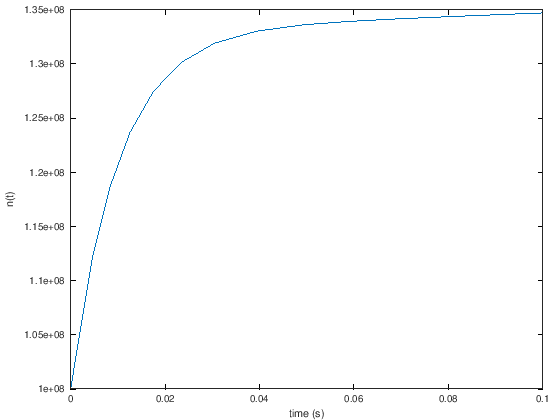

In [23]:
plot(t, n)
xlabel("time (s)");
ylabel("n(t)")